In [4]:
import pandas as pd
from fbprophet import Prophet

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime
from pandas.plotting import scatter_matrix

start = datetime(2015,1,1)
end = datetime(2020,1,1)

rel = web.DataReader('RELIANCE.NS','yahoo',start,end)

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

In [10]:
reldf = rel[['Adj Close']]

In [11]:
reldf.head()

,Adj Close
Date,
2015-01-01,420.596039
2015-01-02,419.482819
2015-01-05,414.888000
2015-01-06,396.058502
2015-01-07,404.679810


In [12]:
reldf.reset_index(inplace=True)

In [14]:
reldf.columns = ['ds','y']

In [33]:
reldf_train, reldf_test = reldf[:-60],reldf[-60:]

In [34]:
m = Prophet()

In [ ]:
m.fit(reldf_train)

In [36]:
future = m.make_future_dataframe(periods=60)

In [37]:
forecast = m.predict(future)

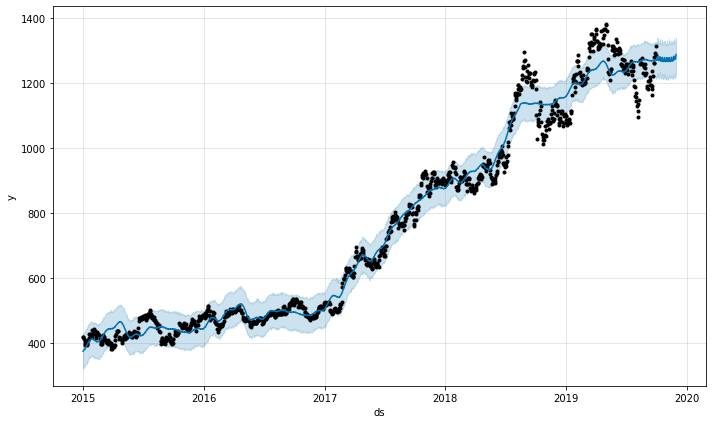

In [38]:
m.plot(forecast);

In [41]:
reldf_test['pred'] = forecast[-60:]['yhat']

<ipython-input-41-f49663394603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reldf_test['pred'] = forecast[-60:]['yhat']


In [43]:
reldf_test.set_index('ds', inplace=True)

In [44]:
reldf_test.head()

,y,pred
ds,,
2019-10-03,1293.880981,1270.356522
2019-10-04,1290.969482,1271.429993
2019-10-07,1292.943481,1271.860033
2019-10-09,1307.401489,1282.516540
2019-10-10,1344.903809,1282.382794


<AxesSubplot:xlabel='ds'>

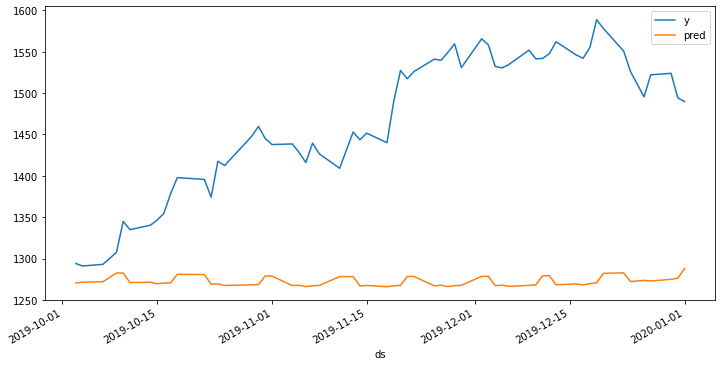

In [45]:
reldf_test.plot()

### This prediction from the legendary Facebook's Prophet is more useless than a simple moving average predictions